# SOCIAL MEDIA MINING - Project
## GROUP 2 : Atharva Pargaonkar, Sulbha Malviya, Sharadha K

### This file contains Feature Engineering, Model Traing and Evaluation

## Task: 
Given news content information, user-news sharing relationships, and user-user follower
relationships, predict whether a given piece of news is real or fake.

## Importing the Datasets

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [3]:
# Defining paths to the data
news_user_txt = '../Data/PolitiFact/PolitiFactNewsUser.txt'
user_user_txt = '../Data/PolitiFact/PolitiFactUserUser.txt'
news_ground_truth = '../Data/PolitiFact/News.txt'
folder_fake_news = '../Data/PolitiFact/FakeNewsContent/'
folder_real_news = '../Data/PolitiFact/RealNewsContent/'
json_to_csv = '../Data/JSON_News.csv'
news_user_csv = '../Data/News_User.csv'
user_user_csv = '../Data/User_User.csv'

In [4]:
# Dataframes
df_JSON_News = pd.read_csv(json_to_csv)
df_JSON_News.head()



,NewsID,filename,title,authors,text,publish_date,images,source,keywords,canonical_link,summary,movies,meta_data,top_img,url
0,1,PolitiFact_Real_1,Trump Just Insulted Millions Who Lost Everythi...,"['Brett Bose', 'Grant Stern', 'Steve Bernstein...",16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,{'$date': 1474934400000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/27/trump-ju...,NaN,[],{'generator': 'Powered by Visual Composer - dr...,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/27/trump-ju...
1,2,PolitiFact_Real_2,Trump Campaign Chair Says Racism Didn't Exist ...,"['Colin Taylor', 'Grant Stern', 'Brett Bose', ...",24.8k SHARES SHARE THIS STORY\n\nRepublican no...,{'$date': 1474502400000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/22/unhinged...,NaN,[],{'generator': 'Powered by Visual Composer - dr...,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/22/unhinged...
2,3,PolitiFact_Real_3,'Locked the black bitch out': White students u...,NaN,The University of North Dakota is investigatin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,PolitiFact_Real_4,Massive Protests Erupt In North Carolina After...,"['Colin Taylor', 'Grant Stern', 'Brett Bose', ...",12k SHARES SHARE THIS STORY\n\nMassive protest...,{'$date': 1474416000000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/21/massive-...,NaN,[],{'generator': 'Powered by Visual Composer - dr...,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/21/massive-...
4,5,PolitiFact_Real_5,Howard Dean ROASTS Trump Over Debate Sniffles:...,['Ryan Denson'],"In the first half of the debate, Donald Trump ...",{'$date': 1474934400000},"['http://i.imgur.com/JeqZLhj.png', 'https://d5...",http://addictinginfo.org,[],http://addictinginfo.com/2016/09/27/howard-dea...,NaN,[],{'publisher': 'Addicting Info | The Knowledge ...,http://addictinginfo.addictinginfoent.netdna-c...,http://addictinginfo.org/2016/09/27/howard-dea...


In [5]:
# Listing the columns of JSON_News.csv
df_JSON_News.columns

Index(['NewsID', 'filename', 'title', 'authors', 'text', 'publish_date',
       'images', 'source', 'keywords', 'canonical_link', 'summary', 'movies',
       'meta_data', 'top_img', 'url'],
      dtype='object')

In [6]:
# Dataframe for news_user
df_news_user = pd.read_csv(news_user_csv)
df_news_user.head()

,NewsID,UserID,Shares
0,240,1,1
1,124,2,1
2,162,3,1
3,233,4,1
4,50,5,1


In [7]:
# Dataframe for user_user
df_user_user = pd.read_csv(user_user_csv)
df_user_user.head()

,follower_id,followed_id
0,507,1
1,1589,1
2,5307,1
3,11421,1
4,13267,1


In [8]:
# Dataframe for news_ground_truth
df_news_ground_truth = pd.read_csv(news_ground_truth, header=None)    
df_news_ground_truth.columns = ['Label']
df_news_ground_truth.head()

,Label
0,PolitiFact_Real_1
1,PolitiFact_Real_2
2,PolitiFact_Real_3
3,PolitiFact_Real_4
4,PolitiFact_Real_5


In [47]:
# Dataframe for news_user
df_news_user = pd.read_csv(news_user_csv)
df_news_user.head()


,NewsID,UserID,Shares
0,240,1,1
1,124,2,1
2,162,3,1
3,233,4,1
4,50,5,1


In [9]:
import networkx as nx

# Graph Initialization
G = nx.read_edgelist(user_user_txt, create_using=nx.DiGraph())  # Directed Graph

In [10]:
# Number of nodes and edges
print('Number of nodes (Unique users):', G.number_of_nodes())
print('Number of edges (User-user interactions):', G.number_of_edges())


Number of nodes (Unique users): 23865
Number of edges (User-user interactions): 574744


In [11]:
# Initializing the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

## Feature Engineering

### Feature 1 : Word Count for title and content


In [13]:
# Feature 1: Word Count for Title and Content
def calculate_word_count(title, text):
    title_word_count = len(str(title).split()) if isinstance(title, str) else 0
    text_word_count = len(str(text).split()) if isinstance(text, str) else 0
    return title_word_count + text_word_count

### Feature 2 : Sentiment Score for Content


In [14]:
# Feature 2: Sentiment Analysis
def calculate_sentiment_scores(text):
    if isinstance(text, str):
        sentiment = analyzer.polarity_scores(text)
        return sentiment['pos'], sentiment['neg'], sentiment['neu'], sentiment['compound']
    return 0, 0, 0, 0  # If not a string, return 0 for all sentiment scores

### Feature 3 : Number of Authors for the news


In [15]:
# Feature 3: Number of Authors
def calculate_number_of_authors(authors):
    return len(str(authors).split(',')) if pd.notna(authors) else 0

### Feature 4 : Unique Users Sharing the News


In [16]:
# Feature 4: Unique User Shares
def calculate_unique_user_shares(news_id, news_user_df):
    filtered_data = news_user_df[news_user_df['NewsID'] == news_id]
    return filtered_data['UserID'].nunique() if not filtered_data.empty else 0

### Feature 5 : Average Clustering Coefficient

In [17]:
# Create a directed graph from the user-user relationships
G2 = nx.from_pandas_edgelist(df_user_user, 'follower_id', 'followed_id', create_using=nx.DiGraph())

In [19]:
def calculate_average_clustering_coefficient(users, G2):
    if not users:  # Handle case where there are no users
        return 0
    clustering_coeffs = nx.clustering(G2)  # Get clustering coefficient for each user
    return sum(clustering_coeffs.get(user, 0) for user in users) / len(users)  # Average of clustering coefficients


### Feature 6 : Average Eigen Vector Centrality

In [21]:
def calculate_average_eigenvector_centrality(users, G2):
    if not users:  # Handle case where there are no users
        return 0
    eigenvector_centrality = nx.eigenvector_centrality(G2)  # Get eigenvector centrality for each user
    return sum(eigenvector_centrality.get(user, 0) for user in users) / len(users)  # Average of centrality values


### Applying the above functions and creating dataframes

In [22]:
df_JSON_News['WordCount'] = df_JSON_News.apply(lambda x: calculate_word_count(x['title'], x['text']), axis=1)           # Word Count for Title and Content
df_JSON_News['PositiveSentiment'], df_JSON_News['NegativeSentiment'], df_JSON_News['NeutralSentiment'], df_JSON_News['CompoundSentiment'] = zip(*df_JSON_News['text'].apply(calculate_sentiment_scores))    # Sentiment Analysis for Content
df_JSON_News['NumberOfAuthors'] = df_JSON_News['authors'].apply(calculate_number_of_authors)                     # Number of Authors for the News
df_JSON_News['UniqueUserShares'] = df_JSON_News['NewsID'].apply(lambda x: calculate_unique_user_shares(x, df_news_user))        # Unique User Shares for the News (News-User Interaction)


df_JSON_News    

,NewsID,filename,title,authors,text,publish_date,images,source,keywords,canonical_link,...,meta_data,top_img,url,WordCount,PositiveSentiment,NegativeSentiment,NeutralSentiment,CompoundSentiment,NumberOfAuthors,UniqueUserShares
0,1,PolitiFact_Real_1,Trump Just Insulted Millions Who Lost Everythi...,"['Brett Bose', 'Grant Stern', 'Steve Bernstein...",16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,{'$date': 1474934400000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/27/trump-ju...,...,{'generator': 'Powered by Visual Composer - dr...,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/27/trump-ju...,236,0.117,0.172,0.711,-0.9359,4,35
1,2,PolitiFact_Real_2,Trump Campaign Chair Says Racism Didn't Exist ...,"['Colin Taylor', 'Grant Stern', 'Brett Bose', ...",24.8k SHARES SHARE THIS STORY\n\nRepublican no...,{'$date': 1474502400000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/22/unhinged...,...,{'generator': 'Powered by Visual Composer - dr...,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/22/unhinged...,527,0.084,0.086,0.830,-0.7320,4,47
2,3,PolitiFact_Real_3,'Locked the black bitch out': White students u...,NaN,The University of North Dakota is investigatin...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,205,0.149,0.108,0.743,0.7430,0,32
3,4,PolitiFact_Real_4,Massive Protests Erupt In North Carolina After...,"['Colin Taylor', 'Grant Stern', 'Brett Bose', ...",12k SHARES SHARE THIS STORY\n\nMassive protest...,{'$date': 1474416000000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/21/massive-...,...,{'generator': 'Powered by Visual Composer - dr...,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/21/massive-...,172,0.060,0.148,0.792,-0.9452,4,19
4,5,PolitiFact_Real_5,Howard Dean ROASTS Trump Over Debate Sniffles:...,['Ryan Denson'],"In the first half of the debate, Donald Trump ...",{'$date': 1474934400000},"['http://i.imgur.com/JeqZLhj.png', 'https://d5...",http://addictinginfo.org,[],http://addictinginfo.com/2016/09/27/howard-dea...,...,{'publisher': 'Addicting Info | The Knowledge ...,http://addictinginfo.addictinginfoent.netdna-c...,http://addictinginfo.org/2016/09/27/howard-dea...,329,0.063,0.143,0.795,-0.9783,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,PolitiFact_Fake_116,"""The 2nd Amendment Was Written Before Guns Wer...",[],Gretchen Carlson is renewing her push for an A...,{'$date': 1498587832000},['http://redherald.com/wp-content/uploads/2017...,http://redherald.com,[],http://redherald.com/gretchen-carlson-2nd-amen...,...,"{'generator': 'WordPress 4.8.1', 'og': {'site_...",http://redherald.com/wp-content/uploads/2017/0...,http://redherald.com/gretchen-carlson-2nd-amen...,454,0.064,0.120,0.816,-0.9789,1,83
236,237,PolitiFact_Fake_117,A Hollywood Star Is Moving To Canada Because O...,[],Many Hollywood celebrities announced that they...,{'$date': 1500057441000},['http://conservativearmy88.com/wp-content/upl...,http://conservativearmy88.com,[],http://conservativearmy88.com/breaking-hollywo...,...,{'description': 'Many Hollywood celebrities an...,http://conservativearmy88.com/wp-content/uploa...,http://conservativearmy88.com/breaking-hollywo...,341,0.130,0.142,0.728,-0.7920,1,7
237,238,PolitiFact_Fake_118,Russian Mansions Obama Seized Were Meant To Be...,[],"Well, well, well…it looks like Obummer wasn’t ...",{'$date': 1499900339000},['http://breaking.newsfeedhunter.com/wp-conten...,http://breaking.newsfeedhunter.com,[],http://breaking.newsfeedhunter.com/russian-man...,...,"{'description': 'Well, well, well…it looks lik...",http://breaking.newsfeedhunter.com/wp-content/...,http://breaking.newsfeedhunter.com/russian-man...,256,0.156,0.135,0.709,0.4764,1,29
238,239,PolitiF

In [23]:
# Extract NewsID and features into a new dataframe
df_features = df_JSON_News[['NewsID', 'WordCount', 'PositiveSentiment', 'NegativeSentiment', 'NeutralSentiment', 'CompoundSentiment', 'NumberOfAuthors', 'UniqueUserShares']]
df_features

,NewsID,WordCount,PositiveSentiment,NegativeSentiment,NeutralSentiment,CompoundSentiment,NumberOfAuthors,UniqueUserShares
0,1,236,0.117,0.172,0.711,-0.9359,4,35
1,2,527,0.084,0.086,0.830,-0.7320,4,47
2,3,205,0.149,0.108,0.743,0.7430,0,32
3,4,172,0.060,0.148,0.792,-0.9452,4,19
4,5,329,0.063,0.143,0.795,-0.9783,1,7
...,...,...,...,...,...,...,...,...
235,236,454,0.064,0.120,0.816,-0.9789,1,83
236,237,341,0.130,0.142,0.728,-0.7920,1,7
237,238,256,0.156,0.135,0.709,0.4764,1,29
238,239,305,0.114,0.133,0.753,-0.7793,1,7


In [24]:
# Group by NewsID and get the list of UserIDs for each article
news_user_grouped = df_news_user.groupby('NewsID')['UserID'].apply(list).reset_index()  # reset_index() to convert the series to a dataframe
# Merge this grouped dataframe with df_JSON_News to calculate the graph-based features
df_features = df_JSON_News.merge(news_user_grouped, on='NewsID', how='left')        # Merge on NewsID to get the list of UserIDs for each article
df_features

,NewsID,filename,title,authors,text,publish_date,images,source,keywords,canonical_link,...,top_img,url,WordCount,PositiveSentiment,NegativeSentiment,NeutralSentiment,CompoundSentiment,NumberOfAuthors,UniqueUserShares,UserID
0,1,PolitiFact_Real_1,Trump Just Insulted Millions Who Lost Everythi...,"['Brett Bose', 'Grant Stern', 'Steve Bernstein...",16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,{'$date': 1474934400000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/27/trump-ju...,...,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/27/trump-ju...,236,0.117,0.172,0.711,-0.9359,4,35,"[105, 1027, 1592, 2486, 2787, 2848, 4301, 4306..."
1,2,PolitiFact_Real_2,Trump Campaign Chair Says Racism Didn't Exist ...,"['Colin Taylor', 'Grant Stern', 'Brett Bose', ...",24.8k SHARES SHARE THIS STORY\n\nRepublican no...,{'$date': 1474502400000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/22/unhinged...,...,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/22/unhinged...,527,0.084,0.086,0.830,-0.7320,4,47,"[312, 2328, 2662, 3025, 4123, 4306, 4843, 5557..."
2,3,PolitiFact_Real_3,'Locked the black bitch out': White students u...,NaN,The University of North Dakota is investigatin...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,205,0.149,0.108,0.743,0.7430,0,32,"[2708, 4534, 5642, 5889, 6175, 6566, 6908, 691..."
3,4,PolitiFact_Real_4,Massive Protests Erupt In North Carolina After...,"['Colin Taylor', 'Grant Stern', 'Brett Bose', ...",12k SHARES SHARE THIS STORY\n\nMassive protest...,{'$date': 1474416000000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/21/massive-...,...,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/21/massive-...,172,0.060,0.148,0.792,-0.9452,4,19,"[4306, 4465, 4726, 5238, 6470, 6918, 7607, 123..."
4,5,PolitiFact_Real_5,Howard Dean ROASTS Trump Over Debate Sniffles:...,['Ryan Denson'],"In the first half of the debate, Donald Trump ...",{'$date': 1474934400000},"['http://i.imgur.com/JeqZLhj.png', 'https://d5...",http://addictinginfo.org,[],http://addictinginfo.com/2016/09/27/howard-dea...,...,http://addictinginfo.addictinginfoent.netdna-c...,http://addictinginfo.org/2016/09/27/howard-dea...,329,0.063,0.143,0.795,-0.9783,1,7,"[111, 301, 7245, 12883, 14814, 15423, 23592]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,PolitiFact_Fake_116,"""The 2nd Amendment Was Written Before Guns Wer...",[],Gretchen Carlson is renewing her push for an A...,{'$date': 1498587832000},['http://redherald.com/wp-content/uploads/2017...,http://redherald.com,[],http://redherald.com/gretchen-carlson-2nd-amen...,...,http://redherald.com/wp-content/uploads/2017/0...,http://redherald.com/gretchen-carlson-2nd-amen...,454,0.064,0.120,0.816,-0.9789,1,83,"[108, 582, 742, 888, 1361, 1386, 1658, 1754, 1..."
236,237,PolitiFact_Fake_117,A Hollywood Star Is Moving To Canada Because O...,[],Many Hollywood celebrities announced that they...,{'$date': 1500057441000},['http://conservativearmy88.com/wp-content/upl...,http://conservativearmy88.com,[],http://conservativearmy88.com/breaking-hollywo...,...,http://conservativearmy88.com/wp-content/uploa...,http://conservativearmy88.com/breaking-hollywo...,341,0.130,0.142,0.728,-0.7920,1,7,"[4749, 7501, 12639, 12977, 13732, 18426, 21958]"
237,238,PolitiFact_Fake_118,Russian Mansions Obama Seized Were Meant To Be...,[],"Well, well, well…it looks like Obummer wasn’t ...",{'$date': 1499900339000},['http://breaking.newsfeedhunter.com/wp-conten...,http://breaking.newsfeedhunter.com,[],http://breaking.newsfeedhunter.com/russian-man...,...,http://breaking.newsfeedhunter.com/wp-content/...,http://breaking.newsfeedhunter.com/russian-man...,256,0.156,0.135,0.709,0.4764,1,29,"[919, 1607, 3731, 

### Calculating network-based metrics based on the users who shared a particular news

In [ ]:
# Calculate the average clustering coefficient for each article  
 
# Commented out to avoid running the code again as it takes a long time to run
'''
df_news_user_grouped = df_news_user.groupby('NewsID')['UserID'].apply(list).reset_index()

# Use tqdm to show progress for each feature calculation
tqdm.pandas(desc="Calculating Avg Clustering Coefficient")
df_news_user_grouped['AvgClusteringCoeff'] = df_news_user_grouped['UserID'].progress_apply(
    lambda users: calculate_average_clustering_coefficient(users, G2)
)   
'''

# Results are stored in a csv file AvgClusteringCoeff.csv

avg_clustering_coeff = pd.read_csv('../Data/AvgClusteringCoeff.csv')
avg_clustering_coeff 

,NewsID,AvgClusteringCoeff
0,1,0.167912
1,2,0.137282
2,3,0.141606
3,4,0.103289
4,5,0.131180
...,...,...
235,236,0.141378
236,237,0.141888
237,238,0.205555
238,239,0.325916


In [ ]:
# Calculate the average eigenvector centrality for each article

# Commented out to avoid running the code again as it takes a long time to run
'''
tqdm.pandas(desc="Calculating Avg Eigenvector Centrality")
df_news_user_grouped['AvgEigenvectorCentrality'] = df_news_user_grouped['UserID'].progress_apply(
    lambda users: calculate_average_eigenvector_centrality(users, G2)
)

# Save the computed AvgEigenvectorCentrality feature to a CSV file
df_news_user_grouped[['NewsID', 'AvgEigenvectorCentrality']].to_csv('../Data/AvgEigenvectorCentrality.csv', index=False)

'''

avg_eigenvector_centrality = pd.read_csv('../Data/AvgEigenvectorCentrality.csv')
avg_eigenvector_centrality

,NewsID,AvgEigenvectorCentrality
0,1,0.006184
1,2,0.003663
2,3,0.002692
3,4,0.002229
4,5,0.003263
...,...,...
235,236,0.002702
236,237,0.000811
237,238,0.003055
238,239,0.000767


In [27]:
# Merge the average clustering coefficient and average eigenvector centrality with the main dataframe
df_features = df_features.merge(avg_clustering_coeff, on='NewsID', how='left')
df_features = df_features.merge(avg_eigenvector_centrality, on='NewsID', how='left')
df_features

,NewsID,filename,title,authors,text,publish_date,images,source,keywords,canonical_link,...,WordCount,PositiveSentiment,NegativeSentiment,NeutralSentiment,CompoundSentiment,NumberOfAuthors,UniqueUserShares,UserID,AvgClusteringCoeff,AvgEigenvectorCentrality
0,1,PolitiFact_Real_1,Trump Just Insulted Millions Who Lost Everythi...,"['Brett Bose', 'Grant Stern', 'Steve Bernstein...",16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,{'$date': 1474934400000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/27/trump-ju...,...,236,0.117,0.172,0.711,-0.9359,4,35,"[105, 1027, 1592, 2486, 2787, 2848, 4301, 4306...",0.167912,0.006184
1,2,PolitiFact_Real_2,Trump Campaign Chair Says Racism Didn't Exist ...,"['Colin Taylor', 'Grant Stern', 'Brett Bose', ...",24.8k SHARES SHARE THIS STORY\n\nRepublican no...,{'$date': 1474502400000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/22/unhinged...,...,527,0.084,0.086,0.830,-0.7320,4,47,"[312, 2328, 2662, 3025, 4123, 4306, 4843, 5557...",0.137282,0.003663
2,3,PolitiFact_Real_3,'Locked the black bitch out': White students u...,NaN,The University of North Dakota is investigatin...,NaN,NaN,NaN,NaN,NaN,...,205,0.149,0.108,0.743,0.7430,0,32,"[2708, 4534, 5642, 5889, 6175, 6566, 6908, 691...",0.141606,0.002692
3,4,PolitiFact_Real_4,Massive Protests Erupt In North Carolina After...,"['Colin Taylor', 'Grant Stern', 'Brett Bose', ...",12k SHARES SHARE THIS STORY\n\nMassive protest...,{'$date': 1474416000000},['http://occupydemocrats.com/wp-content/upload...,http://occupydemocrats.com,[],http://occupydemocrats.com/2016/09/21/massive-...,...,172,0.060,0.148,0.792,-0.9452,4,19,"[4306, 4465, 4726, 5238, 6470, 6918, 7607, 123...",0.103289,0.002229
4,5,PolitiFact_Real_5,Howard Dean ROASTS Trump Over Debate Sniffles:...,['Ryan Denson'],"In the first half of the debate, Donald Trump ...",{'$date': 1474934400000},"['http://i.imgur.com/JeqZLhj.png', 'https://d5...",http://addictinginfo.org,[],http://addictinginfo.com/2016/09/27/howard-dea...,...,329,0.063,0.143,0.795,-0.9783,1,7,"[111, 301, 7245, 12883, 14814, 15423, 23592]",0.131180,0.003263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,PolitiFact_Fake_116,"""The 2nd Amendment Was Written Before Guns Wer...",[],Gretchen Carlson is renewing her push for an A...,{'$date': 1498587832000},['http://redherald.com/wp-content/uploads/2017...,http://redherald.com,[],http://redherald.com/gretchen-carlson-2nd-amen...,...,454,0.064,0.120,0.816,-0.9789,1,83,"[108, 582, 742, 888, 1361, 1386, 1658, 1754, 1...",0.141378,0.002702
236,237,PolitiFact_Fake_117,A Hollywood Star Is Moving To Canada Because O...,[],Many Hollywood celebrities announced that they...,{'$date': 1500057441000},['http://conservativearmy88.com/wp-content/upl...,http://conservativearmy88.com,[],http://conservativearmy88.com/breaking-hollywo...,...,341,0.130,0.142,0.728,-0.7920,1,7,"[4749, 7501, 12639, 12977, 13732, 18426, 21958]",0.141888,0.000811
237,238,PolitiFact_Fake_118,Russian Mansions Obama Seized Were Meant To Be...,[],"Well, well, well…it looks like Obummer wasn’t ...",{'$date': 1499900339000},['http://breaking.newsfeedhunter.com/wp-conten...,http://breaking.newsfeedhunter.com,[],http://breaking.newsfeedhunter.com/russian-man...,...,256,0.156,0.135,0.709,0.4764,1,29,"[919, 1607, 3731, 3948, 4885, 5185, 5508, 6294...",0.205555,0.003055
238,239,PolitiFact_Fake_119,Barack Obama Tweets SICK Attack On John McCain...,['Please Enter Your Name Here'],Barack Obama is a sick human being unfit for a...,{'$date': 1500508800000},['http://dailythings.world/wp-content/uploads/...,http://dailythings.world,[],http://dailythings.world/2017/07/20/barack-oba...,...,305,0.114,0.133,0.753,-0.7793,1,7,"[1476, 12733, 16845, 16960, 18066, 21271, 23149]",0.325916,0.000767


In [28]:
# Extracting the final features for the model in df_final_features
df_final_features = df_features[['NewsID', 'WordCount', 'PositiveSentiment', 'NegativeSentiment', 'NeutralSentiment', 'CompoundSentiment', 'NumberOfAuthors', 'UniqueUserShares', 'AvgClusteringCoeff', 'AvgEigenvectorCentrality']]
df_final_features

,NewsID,WordCount,PositiveSentiment,NegativeSentiment,NeutralSentiment,CompoundSentiment,NumberOfAuthors,UniqueUserShares,AvgClusteringCoeff,AvgEigenvectorCentrality
0,1,236,0.117,0.172,0.711,-0.9359,4,35,0.167912,0.006184
1,2,527,0.084,0.086,0.830,-0.7320,4,47,0.137282,0.003663
2,3,205,0.149,0.108,0.743,0.7430,0,32,0.141606,0.002692
3,4,172,0.060,0.148,0.792,-0.9452,4,19,0.103289,0.002229
4,5,329,0.063,0.143,0.795,-0.9783,1,7,0.131180,0.003263
...,...,...,...,...,...,...,...,...,...,...
235,236,454,0.064,0.120,0.816,-0.9789,1,83,0.141378,0.002702
236,237,341,0.130,0.142,0.728,-0.7920,1,7,0.141888,0.000811
237,238,256,0.156,0.135,0.709,0.4764,1,29,0.205555,0.003055
238,239,305,0.114,0.133,0.753,-0.7793,1,7,0.325916,0.000767


In [29]:
# save the final features to a csv file
df_final_features.to_csv('../Data/FinalFeatures.csv', index=False)

In [30]:
df_final_features.columns

Index(['NewsID', 'WordCount', 'PositiveSentiment', 'NegativeSentiment',
       'NeutralSentiment', 'CompoundSentiment', 'NumberOfAuthors',
       'UniqueUserShares', 'AvgClusteringCoeff', 'AvgEigenvectorCentrality'],
      dtype='object')

In [32]:
# Get the Labels from the news_ground_truth dataframe
df_news_ground_truth

,Label
0,PolitiFact_Real_1
1,PolitiFact_Real_2
2,PolitiFact_Real_3
3,PolitiFact_Real_4
4,PolitiFact_Real_5
...,...
235,PolitiFact_Fake_116
236,PolitiFact_Fake_117
237,PolitiFact_Fake_118
238,PolitiFact_Fake_119


In [33]:
# One hot encoding the labels for the model
# 0 to 120 are Real News and 121 to 233 are Fake News
# Real News is encoded as 1 and Fake News is encoded as 0

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

df_final_features['Label'] = df_final_features['NewsID'].apply(lambda x: 1 if x < 121 else 0)
df_final_features

,NewsID,WordCount,PositiveSentiment,NegativeSentiment,NeutralSentiment,CompoundSentiment,NumberOfAuthors,UniqueUserShares,AvgClusteringCoeff,AvgEigenvectorCentrality,Label
0,1,236,0.117,0.172,0.711,-0.9359,4,35,0.167912,0.006184,1
1,2,527,0.084,0.086,0.830,-0.7320,4,47,0.137282,0.003663,1
2,3,205,0.149,0.108,0.743,0.7430,0,32,0.141606,0.002692,1
3,4,172,0.060,0.148,0.792,-0.9452,4,19,0.103289,0.002229,1
4,5,329,0.063,0.143,0.795,-0.9783,1,7,0.131180,0.003263,1
...,...,...,...,...,...,...,...,...,...,...,...
235,236,454,0.064,0.120,0.816,-0.9789,1,83,0.141378,0.002702,0
236,237,341,0.130,0.142,0.728,-0.7920,1,7,0.141888,0.000811,0
237,238,256,0.156,0.135,0.709,0.4764,1,29,0.205555,0.003055,0
238,239,305,0.114,0.133,0.753,-0.7793,1,7,0.325916,0.000767,0


In [34]:
# Get the label for newsID 119, 120, 121, 122
print('NewsID 119:', df_final_features[df_final_features['NewsID'] == 119]['Label'].values[0])
print('NewsID 120:', df_final_features[df_final_features['NewsID'] == 120]['Label'].values[0])
print('NewsID 121:', df_final_features[df_final_features['NewsID'] == 121]['Label'].values[0])
print('NewsID 122:', df_final_features[df_final_features['NewsID'] == 122]['Label'].values[0])

NewsID 119: 1
NewsID 120: 1
NewsID 121: 0
NewsID 122: 0


## Model Training and Evaluation

In [36]:
# Importing the required libraries for the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



In [37]:
# Separate features and labels
X = df_final_features.drop(columns=['Label', 'NewsID'])  # Features only
y = df_final_features['Label']  # Ground truth labels

# Defining the models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

In [38]:
from sklearn.model_selection import StratifiedKFold

# K-Fold Cross Validation
kfolds = 5  # Number of folds
strat_kf = StratifiedKFold(n_splits= kfolds, shuffle=True, random_state=42)

In [39]:
# Store the results in a dictionary
results = { name : {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []} for name in models}


### Using K-Fold Cross Validation

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Loop for K-Fold Cross Validation
for train_index, test_index in strat_kf.split(X, y):            # Stratified K-Fold for imbalanced dataset (maintains the ratio of classes)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   # Features
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]   # Labels
    
    for model_name, model in models.items():                # Loop through each model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate the evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred, zero_division=1)
        f1 = f1_score(y_test, y_pred, zero_division=1)

        # Storing the results in the dictionary
        results[model_name]['Accuracy'].append(accuracy)
        results[model_name]['Precision'].append(precision)
        results[model_name]['Recall'].append(recall)
        results[model_name]['F1 Score'].append(f1)

# Calculate average performance for each model
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance (averaged over {kfolds} folds):")
    print(f"  Accuracy: {np.mean(metrics['Accuracy']):.3f}")
    print(f"  Precision: {np.mean(metrics['Precision']):.3f}")
    print(f"  Recall: {np.mean(metrics['Recall']):.3f}")
    print(f"  F1 Score: {np.mean(metrics['F1 Score']):.3f}")


Random Forest Performance (averaged over 5 folds):
  Accuracy: 0.754
  Precision: 0.757
  Recall: 0.750
  F1 Score: 0.752

Logistic Regression Performance (averaged over 5 folds):
  Accuracy: 0.746
  Precision: 0.774
  Recall: 0.708
  F1 Score: 0.738

SVM Performance (averaged over 5 folds):
  Accuracy: 0.642
  Precision: 0.612
  Recall: 0.783
  F1 Score: 0.683

Decision Tree Performance (averaged over 5 folds):
  Accuracy: 0.667
  Precision: 0.671
  Recall: 0.667
  F1 Score: 0.664

Naive Bayes Performance (averaged over 5 folds):
  Accuracy: 0.621
  Precision: 0.592
  Recall: 0.792
  F1 Score: 0.676


### Analysis of the above Mettrics: 
- Random Forest and Logistic Regression emerged as the most effective models, with accuracies of 75.4% and 74.6%, respectively, and balanced performance across precision, recall, and F1 score. 
- Random Forest demonstrates reliable accuracy with an optimal balance between correctly identifying fake news (recall) and minimizing false positives (precision), while Logistic Regression offers even higher precision, making it particularly suitable where misclassification of real news as fake is undesirable. 
- SVM and Naive Bayes showed high recall but lower precision and accuracy, indicating they are better at detecting fake news but may lead to more false positives. 
- Decision Tree, while balanced, performed consistently at a moderate level without the robustness of the top models. 

### Visualizing the results of K-Fold Cross Validation

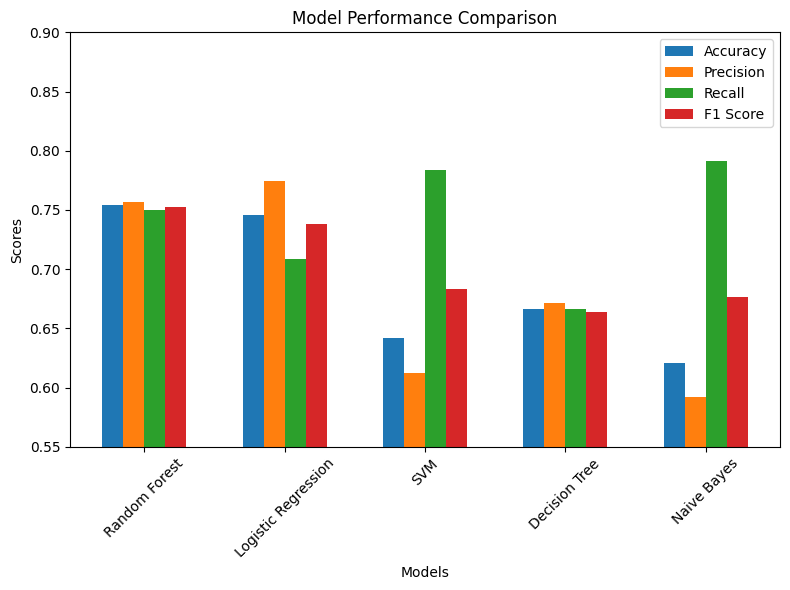

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = list(results.keys())
avg_scores = {metric: [np.mean(results[model][metric]) for model in model_names] for metric in metrics}

# Set up the bar width and figure size
bar_width = 0.15
x = np.arange(len(model_names))

# Plot each metric as a separate bar in a grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, avg_scores[metric], width=bar_width, label=metric)

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names)
ax.set_ylim(0.55, 0.9)  # Set y-axis range for better visibility of differences

ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This a comparitive bar graph for all four metrics across the five classifiers we have trained.

### Hyperparameter-Tuning the Classifiers

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define parameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']  # only solvers that support 'l1' penalty
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Naive Bayes': {
        # GaussianNB does not have hyperparameters to tune directly with GridSearchCV, so we use it as-is
    }
}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Perform hyperparameter tuning with GridSearchCV
best_models = {}
for model_name, model in models.items():
    if model_name in param_grids:
        print(f"\nTuning {model_name} :")
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X, y)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")
    else:
        # Naive Bayes doesn't have tunable parameters in this case, so we just use it as-is
        best_models[model_name] = model

# best_models dictionary now contains the tuned models ready for evaluation



Tuning Random Forest :
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validated accuracy: 0.7792

Tuning Logistic Regression :
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated accuracy: 0.7750

Tuning SVM :
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated accuracy: 0.7750

Tuning Decision Tree :
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best cross-validated accuracy: 0.7250

Tuning Naive Bayes :
Best parameters for Naive Bayes: {}
Best cross-validated accuracy: 0.6500


### Analysis of the metrics after Hyperparameter Tuning the models
- Random Forest achieved the highest cross-validated accuracy at 77.9%, indicating that adjustments like increasing the n_estimators to 300 and limiting max_depth to 10 improved its effectiveness for fake news classification. 
- Logistic Regression and SVM both reached accuracies of 77.5% with their optimized parameters, showing strong performance and reliability, especially given Logistic Regression's high precision. 
- The tuned Decision Tree improved somewhat but still lagged behind, with a best accuracy of 72.5%, likely due to the model's  simplicity and sensitivity to small data variations. 
- Naive Bayes, with no hyperparameter changes, remained the least accurate at 65%, underscoring its limited suitability for this task compared to the other models.

### Plotting the Cross-Validatied Accuracy of Hyperparameter Tuned models

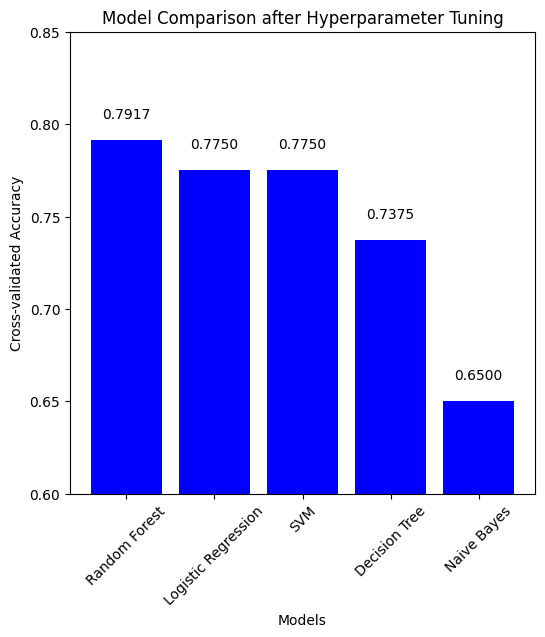

In [44]:
import matplotlib.pyplot as plt

# Model names and their corresponding best cross-validation accuracy scores
model_names = ['Random Forest', 'Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes']
accuracy_scores = [0.7917, 0.7750, 0.7750, 0.7375, 0.6500]

# Plotting the bar graph
plt.figure(figsize=(6, 6))
plt.bar(model_names, accuracy_scores, color='b')

# Bar width
bar_width = 0.1

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Cross-validated Accuracy')
plt.title('Model Comparison after Hyperparameter Tuning')
plt.ylim(0.60, 0.85)  # Accuracy is between 0 and 1

# Displaying the accuracy values on top of each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

# Display the graph
plt.xticks(rotation=45)
plt.show()


## Bonus: Using Train Test Split Approach to check the metrics

In [45]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_final_features.drop(columns=['Label', 'NewsID'])  # Features only
y = df_final_features['Label']  # Ground truth labels

# Stratified train-test split (ensures the same proportion of classes in train and test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Defining the models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Store the results in a dictionary
results = {name: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []} for name in models}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    # Store the results in the dictionary
    results[model_name]['Accuracy'].append(accuracy)
    results[model_name]['Precision'].append(precision)
    results[model_name]['Recall'].append(recall)
    results[model_name]['F1 Score'].append(f1)

# Calculate average performance for each model
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    print(f"  Accuracy: {np.mean(metrics['Accuracy']):.3f}")
    print(f"  Precision: {np.mean(metrics['Precision']):.3f}")
    print(f"  Recall: {np.mean(metrics['Recall']):.3f}")
    print(f"  F1 Score: {np.mean(metrics['F1 Score']):.3f}")



Random Forest Performance:
  Accuracy: 0.750
  Precision: 0.773
  Recall: 0.708
  F1 Score: 0.739

Logistic Regression Performance:
  Accuracy: 0.771
  Precision: 0.810
  Recall: 0.708
  F1 Score: 0.756

SVM Performance:
  Accuracy: 0.583
  Precision: 0.583
  Recall: 0.583
  F1 Score: 0.583

Decision Tree Performance:
  Accuracy: 0.667
  Precision: 0.722
  Recall: 0.542
  F1 Score: 0.619

Naive Bayes Performance:
  Accuracy: 0.625
  Precision: 0.615
  Recall: 0.667
  F1 Score: 0.640


### Analysis of the above metrics:
- With an 80-20 train-test split, Logistic Regression delivered the best results, achieving the highest accuracy of 77.1% and F1 score of 0.756, indicating it balanced both precision (0.810) and recall (0.708).
- This model's strong performance suggests that it effectively differentiates between real and fake news under these settings. 
- Random Forest also performed well, with a close accuracy of 75.0% and F1 score of 0.739, showing good precision (0.773) but slightly lower recall (0.708) than Logistic Regression.
- The SVM classifier struggled to effectively separate real and fake news, reflected by its lower accuracy and an F1 score of 0.583, indicating it classified both classes without strong discrimination. The Decision Tree showed moderate performance, with an accuracy of 66.7% and an F1 score of 0.619, but its lower recall (0.542) suggests it missed more fake news cases compared to the top models.
- Naive Bayes showed relatively balanced precision and recall (both around 0.62-0.64), with an accuracy of 62.5%, but it was less effective than Logistic Regression or Random Forest.

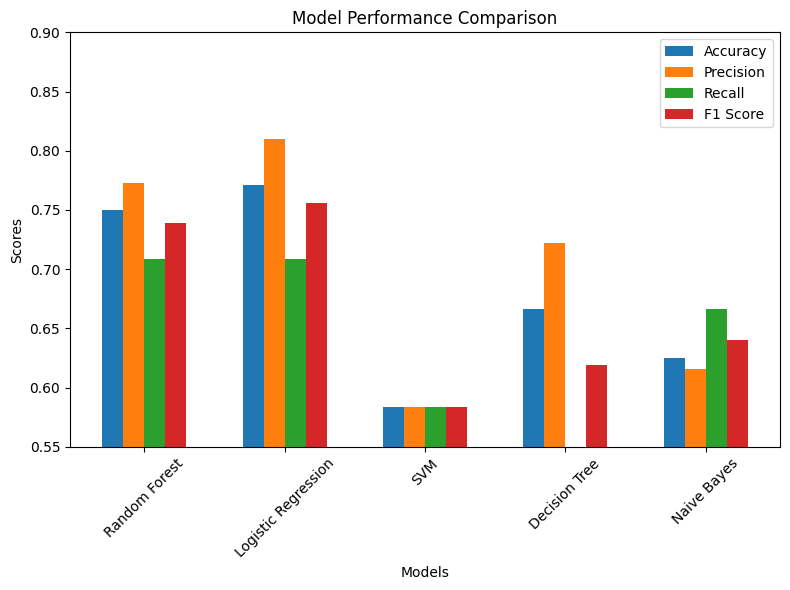

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = list(results.keys())
avg_scores = {metric: [np.mean(results[model][metric]) for model in model_names] for metric in metrics}

# Set up the bar width and figure size
bar_width = 0.15
x = np.arange(len(model_names))

# Plot each metric as a separate bar in a grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, avg_scores[metric], width=bar_width, label=metric)

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names)
ax.set_ylim(0.55, 0.9)  # Set y-axis range for better visibility of differences

ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

Based on the results of our experimentation with various machine learning models, the Logistic Regression model emerged as the top performer in terms of accuracy and F1 score, indicating its reliable ability to distinguish between real and fake news within our dataset. Random Forest also performed well, particularly in terms of precision, suggesting it is also effective at identifying fake news. 

Other models, like SVM, Decision Tree, and Naive Bayes, showed lower performance, with SVM struggling the most, likely due to the limited feature set and the nuances of the fake news classification task.

In conclusion, Random Forest is the best choice for this fake news classification task. It provided a consistent balance between precision and recall, demonstrating that it captures the distinguishing features of real vs fake news effectively. 

The project highlights that well-selected features—such as sentiment scores, word count, unique user shares, and clustering measures—combined with robust, simple models like Logistic Regression, can form an efficient and interpretable solution for detecting fake news. 